In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex":True,
    "font.family":"serif",
})

In [2]:
xlabel_kwargs = {'fontsize':15}
ylabel_kwargs = {'fontsize':15}
legend_kwargs = {'fontsize':12}
title_kwargs = {'fontsize':18}
xticks_kwargs = {'fontsize':12}
yticks_kwargs = {'fontsize':12}

In [3]:
cwd = os.getcwd()

gru_dname_list = [
    # cwd + '/saved_AR_AERNN_rnn/AR_rnn_{:03d}'.format(i) for i in range(2, 6)
    cwd + '/saved_AR_AERNN_rnn/AR_rnn_002',
    cwd + '/saved_AR_AERNN_rnn/AR_rnn_006',
    cwd + '/saved_AR_AERNN_rnn/AR_rnn_007',
    cwd + '/saved_AR_AEESN_rnn/AR_ESN_ensemble_005',
    cwd + '/saved_pod_galerkin/podGalerkin_000',
]

print('gru_dname : ', gru_dname_list)

gru_dname :  ['/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_006', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_007', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AEESN_rnn/AR_ESN_ensemble_005', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_pod_galerkin/podGalerkin_000']


In [4]:
plot_dir = cwd + '/study-03/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [6]:
gru_ph_list_global = []
gru_numoutsteps_global = []
for gru_dname in gru_dname_list:
    gru_ph_list = []
    gru_numoutsteps = []
    for fname in os.listdir(gru_dname):
        if fname.endswith('.npz') and fname.startswith('prediction_horizon'):
            gru_ph_list.append(gru_dname + '/' + fname)
            fname = fname[0:-4]
            fname = fname[::-1]
            idx = fname.find('--')
            fname = fname[8:idx]
            fname = fname[::-1]
            try:
                gru_numoutsteps.append(int(fname))
            except:
                gru_numoutsteps.append(0)
#             if fname == 'ZERO':
#                 gru_numoutsteps.append(0)
#             else:
#                 gru_numoutsteps.append(int(fname))

    print(gru_ph_list)
    print(gru_numoutsteps)

    gru_ph_list = np.array(gru_ph_list)
    gru_numoutsteps = np.array(gru_numoutsteps)

    sort_idx = np.argsort(gru_numoutsteps)
    gru_numoutsteps = gru_numoutsteps[sort_idx]
    gru_ph_list = gru_ph_list[sort_idx]

    print('')
    print(gru_ph_list)
    print(gru_numoutsteps)
    
    gru_ph_list_global.append(gru_ph_list)
    gru_numoutsteps_global.append(gru_numoutsteps)
    
    print('\n\n\n')

['/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--20outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--ZEROoutsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--10outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--5outsteps.npz', '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--15outsteps.npz']
[20, 0, 10, 5, 15]

['/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--ZEROoutsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_rnn/AR_rnn_002/prediction_horizons-testingdata--5outsteps.npz'
 '/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_AR_AERNN_r

In [7]:
gru_ph_arr_list_global = []
gru_medians_global = []
for ii in range(len(gru_ph_list_global)):
    gru_ph_list = gru_ph_list_global[ii]
    gru_ph_arr_list = []
    gru_medians = []
    for fname in gru_ph_list:
        with np.load(fname, allow_pickle=True) as f:
            try:
                ph_arr = f['prediction_horizon_arr']
            except:
                for key in f.keys():
                    if key.find('og') != -1:
                        ph_arr = f[key]
                        break
            gru_ph_arr_list.append(ph_arr)
        num_runs = ph_arr.shape[0]
        ph_arr.sort()
        gru_medians.append(ph_arr[int(0.5*num_runs-1)])
    print(gru_medians)

    gru_ph_arr_list_global.append(gru_ph_arr_list)
    gru_medians_global.append(gru_medians)
    print('\n\n')

gru_ph_arr_list_global = np.array(gru_ph_arr_list_global)

print(gru_ph_list)
print(gru_ph_arr_list_global.shape)

[1.3587031685226993, 1.721024013462086, 2.3550854921060123, 2.6268261258105525, 2.7174063370453987]



[1.5398635909923928, 1.6304438022272392, 2.0833448584014724, 2.0833448584014724, 2.445665703340859]



[0.724641689878773, 1.6304438022272392, 1.449283379757546, 1.5398635909923928, 1.5398635909923928]



[2.3550854921060123, 2.3550854921060123, 2.2645052808711656, 2.3550854921060123, 2.2645052808711656]



[0.34420481214597853]



['/home/rkaushik/Documents/Thesis/MLROM/new_lorenz/saved_pod_galerkin/podGalerkin_000/prediction_horizons-testingdata--PODGalerkin.npz']
(5,)


/tmp/ipykernel_561065/3318436245.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gru_ph_arr_list_global = np.array(gru_ph_arr_list_global)


In [13]:
idx_plot = [np.argsort(elem, axis=0)[::-1] for elem in gru_medians_global] 
print(idx_plot, idx_plot[:][0])

[array([4, 3, 2, 1, 0]), array([4, 3, 2, 1, 0]), array([1, 4, 3, 2, 0]), array([3, 1, 0, 4, 2]), array([0])] [4 3 2 1 0]


In [ ]:
# print(gru_ph_arr_list_global.shape)

# temp_ = np.empty_like(gru_ph_arr_list_global)
# temp_[:] = gru_ph_arr_list_global

# temp_ = temp_.transpose(1, 0, 2)
# temp_ = temp[idx_plot[0]]
# temp_ = temp_.transpose(1, 0, 2)

# temp_.shape, gru_ph_arr_list_global.shape

In [20]:
def gru_plot(box_or_violin, idx_plot=idx_plot):#, idx_plot=-1):
    # idx_plot = idx_plot[:, 0]
    plot_arr = [gru_ph_arr_list_global[i][idx_plot[i][0]] for i in range(len(idx_plot))]
#     plot_arr = gru_ph_arr_list_global.transpose(1,0,2)[idx_plot[:][0]].transpose(1,0,2)[:,0]
    yticks_min = 0
    yticks_max = int(np.max(plot_arr)+1)
    yticks_pos = np.arange(yticks_min, yticks_max+1, 1)

    # box_or_violin = 2 # 0 == box
    #                   # 1 == violin
    #                   # 2 == box with violin super-imposed
    if box_or_violin == 0:
        parts = plt.boxplot(
            list(plot_arr),
        )
    elif box_or_violin == 1:
        parts = plt.violinplot(
            list(plot_arr),
            showmedians=True
        )
    elif box_or_violin == 2:
        parts = plt.violinplot(
            list(plot_arr),
        )
        parts['cmaxes'].set(linewidth=0.)
        parts['cmins'].set(linewidth=0.)
        parts['cbars'].set(linewidth=0.)
        # parts['medians'].set(linewidth=0.)
        parts2 = plt.boxplot(
            list(plot_arr),
        )
    
    plt.grid(True)
    plt.xticks(
        np.arange(gru_ph_arr_list_global.shape[0]) + 1,
        ['GRU', 'LSTM', 'Simple RNN', 'ESN', 'POD-Galerkin'],
    #     ('Teacher\nforced',) + tuple([str(elem) for elem in esn_numoutsteps[1:]]),
        **xticks_kwargs
    )
    plt.yticks(yticks_pos, **yticks_kwargs)
    plt.xlabel('Network Type', **xlabel_kwargs)
    plt.ylabel('Prediction Horizon [LT]', **ylabel_kwargs)
    plt.title('Single Layer Networks', **title_kwargs)

    if box_or_violin == 0:
        savefig_name = 'study03--boxplot.pdf'
    elif box_or_violin == 1:
        savefig_name = 'study03--violinplot.pdf'
    elif box_or_violin == 2:
        savefig_name = 'study03--boxandviolinplot.pdf'

    plt.savefig(plot_dir+'/'+savefig_name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
#     # plt.violinplot(
#     #     list(gru_ph_arr_list_global[:, -1]),
#     #     showmedians=True,
#     # #     quantiles=[[0.25, 0.75] for i in range(gru_ph_arr_list_global.shape[0])],
#     # )
#     plt.boxplot(
#         list(gru_ph_arr_list_global[:, -1]),
#     #     showmedians=True,
#     #     quantiles=[[0.25, 0.75] for i in range(gru_ph_arr_list_global.shape[0])],
#     )
#     plt.grid(True)
#     plt.xticks(
#         np.arange(gru_ph_arr_list_global.shape[0]) + 1,
#         ['20', '50', '80'],
#     #     ('Teacher\nforced',) + tuple([str(elem) for elem in esn_numoutsteps[1:]]),
#         **xticks_kwargs
#     )
#     plt.yticks(**yticks_kwargs)
#     plt.xlabel(r'$n^r \atop{^{(\mathrm{layer \ size} = n^{r} \times n^{ls})}}$', fontsize=20)#**xlabel_kwargs)
#     plt.ylabel('Prediction Horizon [LT]', **ylabel_kwargs)
#     plt.title('GRU', **title_kwargs)

#     plt.savefig(plot_dir+'/gru-study02--boxplot.pdf', dpi=300, bbox_inches='tight')
#     # plt.savefig(plot_dir+'/gru-study02--violinplot.pdf', dpi=300, bbox_inches='tight')
#     plt.show()

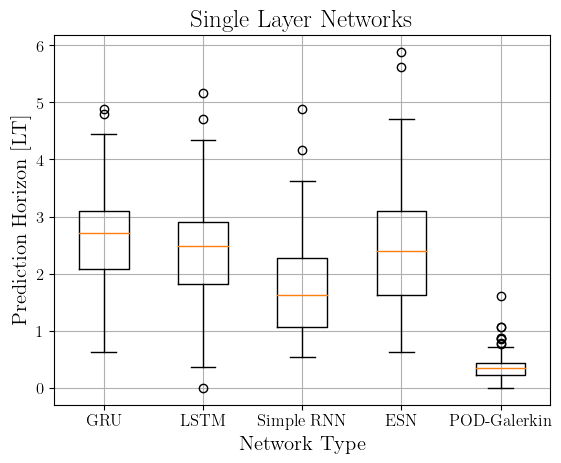

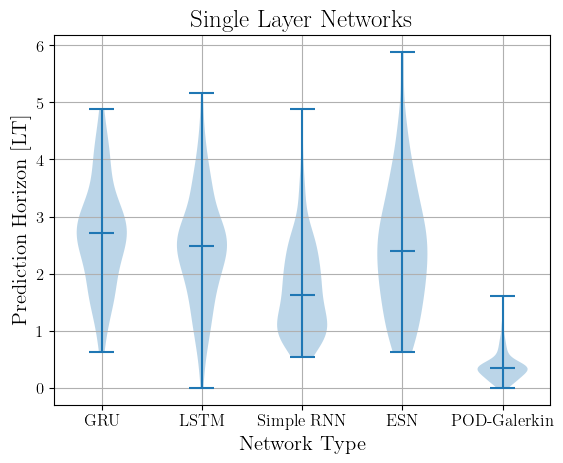

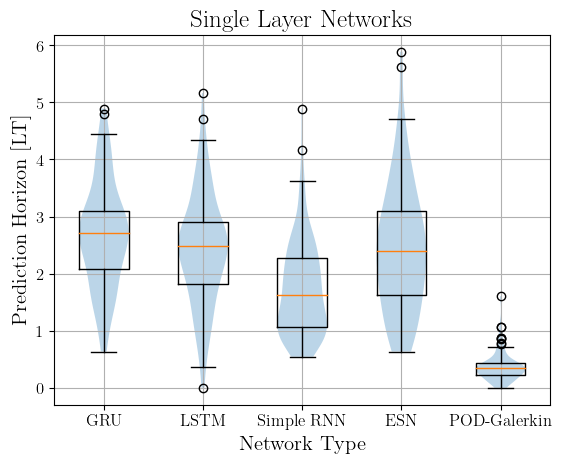

In [21]:
for i in range(3):
    gru_plot(i)